# Analiza besed iz SSKJ2 glede na besedno vrsto

Uvozimo pakete in pomožne datoteke ter nastavimo koliko je največje število celic v razpredelnici, ki jih program prikaže.

In [1]:
import main
import pandas as pd
import os
from spremenljivke import *

%matplotlib inline
pd.set_option("display.max_rows", 50)

V tej celici lahko (in vas spodbujam, da to tudi naredite) zamenjate podatke. 
v prvi vrstici lahko spremenite dva parametra `od` in `do`. Ta dva parametra povesta od katere do vključno katere strani želite analizirati slovar. Strani je 4884, in za pridobitev vseh teh podatkov računalnik potrebuje približno 5 ur (vsaj moj računalnik je porabil toliko, ampak priznam, da nima veliko RAMa). Zaradi dolžine programa priporočam da se omejite na 1o do 20 strani.

Funkcija `main.main()` pridobi podatke iz interneta in jih pospravi v datoteko `besede.csv`, shranjeni v mapi `slovar`

Če ste enkrat to funkcijo že pognali in si želite zajeti druge podatke lahko spremenite vresdnosti `downlovdaj` in `pocsvjaj` na `True`. Tako se bo program izvedel še enkrat, kljub temu, da že imate te podatke.

Parameter `downlvdaj` skrbi, da računalnik pridobi podatke iz interneta, parameter `pocsvjaj` poskrbi da so ti podatki v računalniku bolj berljivi obliki.

In [2]:
main.main(downlovdaj=False, pocsvjaj=True, od=204-24, do=204)

Datoteka html že obstaja
v procesu pridobivanja posatkov iz htmlja v csv...
regexanje...
html0.html
html1.html
html10.html
html11.html
html12.html
html13.html
html14.html
html15.html
html16.html
html17.html
html18.html
html19.html
html2.html
html20.html
html21.html
html22.html
html23.html
html24.html
html25.html
html26.html
html27.html
html28.html
html29.html
html3.html
html30.html
html31.html
html32.html
html33.html
html34.html
html35.html
html36.html
html37.html
html38.html
html39.html
html4.html
html40.html
html41.html
html42.html
html43.html
html44.html
html45.html
html46.html
html47.html
html48.html
html5.html
html6.html
html7.html
html8.html
html9.html
Končano


V spodnji celici si lahko izberete, katere podatke si želite uporabiti. Na volo imate dve mapi:
* `mapa = mapa_slovar` vsebuje podatke, ki ste jih v prejšnji celici s kodo pridobili
* `mapa = cel_slovar` vsebuje podatke, ki ste jih dobili skupaj s kodo. Vsebujejo že vse podatke, ki bi jih lahko pridobili

v spodnjo celico prekopirajte kodo v `______`, glede na to katere podatke želite zanalizirati

In [3]:
mapa = mapa_slovar

Pot do željenih podatkov je shranimo v spremenljivko `pot_slovar_csv`, pod spremenljivko `razpredelnica` pa shranimo tabelo podatkov.

Poglejmo si kako izgleda razpredelnica.

In [4]:
pot_slovar_csv = os.path.join(mapa, csv)
razpredelnica = pd.read_csv(pot_slovar_csv)
razpredelnica

,ime,vrsta
0,á,samostalnik moškega spola
1,à,prislov
2,à,členek
3,a,členek
4,a,veznik
...,...,...
97664,grmíčav,pridevnik
97665,grmíček,samostalnik moškega spola
97666,grmíčevje,samostalnik srednjega spola
97667,grmíčje,samostalnik srednjega spola


Poglejmo si koliko je posamezne besedne vrste.

Funkcija `štetje_stolpca` prešteje kolikokrat se vsaka različna vrednost v stolpcu ponovi ter jih uredi po padajočih vrednostih. 
To uporabimo na stolpcu `vrsta`. 

In [5]:
def štetje_stolpca(raz, stolpec):
    raz = raz.groupby(stolpec)[[stolpec]].count()
    raz.rename(columns={stolpec:"število"}, inplace=True)
    raz.sort_values("število", inplace=True, ascending=False)
    return raz

štetje_stolpca(razpredelnica, "vrsta")

,število
vrsta,
samostalnik moškega spola,23263
samostalnik ženskega spola,22614
pridevnik,21491
dovršni glagol,8699
samostalnik srednjega spola,8474
nedovršni glagol,6664
neznano,3195
prislov,1168
dovršni in nedovršni glagol,746


To si lahko pogledamo na grafu

<Axes: xlabel='vrsta'>

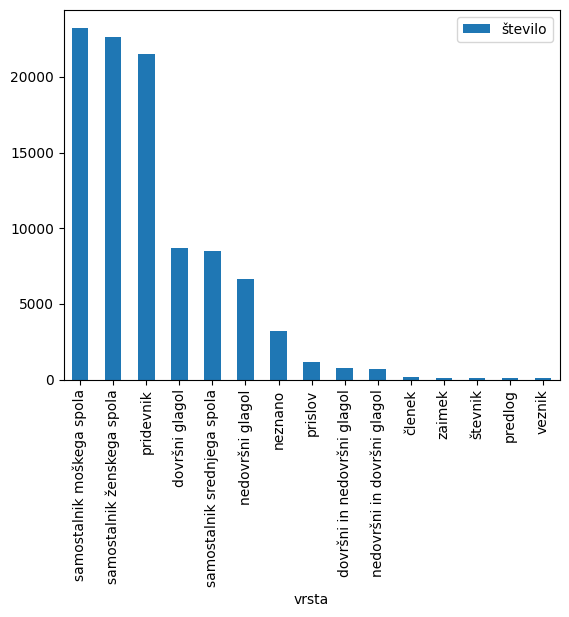

In [6]:
štetje_stolpca(razpredelnica, "vrsta").plot.bar()

Kot lahko vidite, to niso le besedna vrste ampak tudi dodatni podatki kot so spol in dovršnost. Zaradi teh dodatnih podatkov težje vidimo koliko je besed posamezne besedne vrste. Popravimo to. 

Spodnja koda doda kopiji originalne razpredelnice še eno vrstico poimenovano `"besedna vrsta"`, kjer je podana besedna vrsta besede, brez nepotrebnih dodatnih podatkov.

In [7]:
raz_vrste = razpredelnica.copy()
for vrsta in besedne_vrste:
    raz_vrste.loc[raz_vrste["vrsta"].apply(lambda x: type(x) != float and vrsta in x), "besedna vrsta"] = vrsta
# raz_vrste.loc[raz_vrste["vrsta"].apply(lambda x: type(x) == float), "besedna vrsta"] = "neznano"

štetje_stolpca(raz_vrste, "besedna vrsta")

,število
besedna vrsta,
samostalnik,54351
pridevnik,21491
glagol,16829
neznano,3195
prislov,1168
členek,183
zaimek,131
števnik,126
veznik,76


Veliko bolje. Zdaj bo tudi graf natančnejši.

<Axes: xlabel='besedna vrsta'>

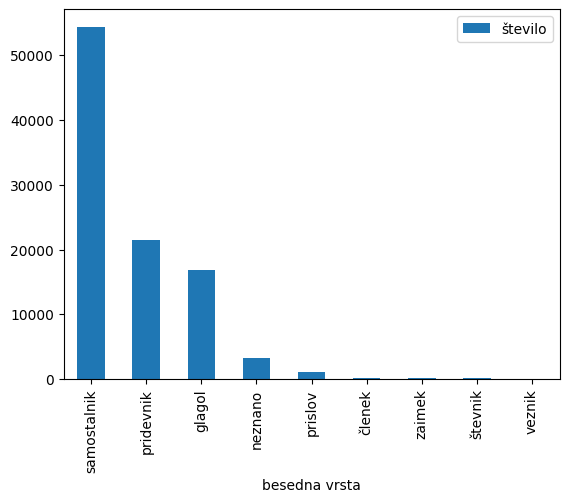

In [8]:
štetje_stolpca(raz_vrste, "besedna vrsta").plot.bar()

Sedaj ko smo uspeli ločiti besede na posamezne besedne vrste, lahko iščemo povprečno besedo besedne vrste.
Povprečna beseda je tisti niz črk, za katerega velja, da je njegova dolžina toliko kolikor je povprečje dolžin besed (zaokroženo seveda na celo število) in njegova i-ta črka je tista, ki se največkrat pojavi na i-tem mestu besed. 

Funkcija `razpredelnica_vrste` vrne podtabelo željene besedne vrste. Na primer za samostalnike.

In [9]:
def razpredelnica_vrste(vrsta="", raz = razpredelnica):
    seznam = raz["vrsta"].apply(lambda x: vrsta in x)
    return raz.loc[seznam]

razpredelnica_samostalnikov = razpredelnica_vrste("samostalnik")
razpredelnica_samostalnikov

,ime,vrsta
0,á,samostalnik moškega spola
7,ábak,samostalnik moškega spola
8,abalienácija,samostalnik ženskega spola
10,abbé,samostalnik moškega spola
11,abc,samostalnik moškega spola
...,...,...
97662,grmíčar,samostalnik moškega spola
97665,grmíček,samostalnik moškega spola
97666,grmíčevje,samostalnik srednjega spola
97667,grmíčje,samostalnik srednjega spola


Funkcija `povprečna_beseda` vrne povprečno besedo neke razpredelnice. Kaj točno je povprečna beseda?

Za povprečno besedno držijo naslednje stvari:
* število črk povprečne besedde je povprečje dolžin besed, zaokroženo na celo število
* na i-tem mestu povprečne besede je črka, ki se med vsemi črkami pojavi največkrat na i-tem mestu

Ker smo prej uspešno ločili tabelo besed na posamezne besedne vrste, lahko najdemo tudi povprečno besedno za posamezno besedno vrsto.

v zadnji vrstici lahko med `""` zapišete povprečno besedo katere besedne vrste želite videti. Na primer če zapišete `"členek"`, vam bo program vrnil povprečno besedo vseh členkov. Če želite povprečno besedo vseh besed namesto besedne vrste pustite prazno (`""`). Besede, za katere je besedna vrsta neznao, spadajo pod `"neznano"`.

In [10]:

def črka_besede(i, beseda):
    if len(beseda)<=i:
        return 
    return beseda[i]

from collections import Counter
def povprečna_beseda(raz):
    try:
        dolžina = round(raz["ime"].apply(len).sum()/raz["ime"].count())
    except ValueError:
        return "Oprostite, te besedne vrste ni v razpredelnici"
    odg = ""
    for i in range(dolžina):
        seznam = raz["ime"].apply(lambda beseda: črka_besede(i, beseda))
        crke = Counter(seznam).most_common() 
        if crke[0][0] == None: #Če je večina besed krajših od i
            odg += crke[1][0]
        else:
            odg += crke[0][0]
    return odg

povprečna_beseda(razpredelnica_vrste("samostalnik"))

'prronnnna'

Kot lahko opazite, povprečna beseda ni nujno beseda iz slovarja, torej sploh ni beseda. Zato sem spisala funkcijo `besedičenje()`, ki poskuša najti besedo, ki je najbližje povprečni besedi. Vendar da bo funkcija besedičenje efektivno delovala, potrebujemo pomožno funkcijo `poenostavi_besedo()`, ki zamenja simbole, ki sporočajo naglas, v simbole, ki tega ne počnejo.

In [38]:
def poenostavi_besedo(beseda):
    # bes = bes.replace("a", "aáà").replace("e", "eéèê").replace("o", "oóòô").replace("i", "iíì")
    beseda = beseda.replace("á", "a").replace("à", "a").replace("é", "e").replace("è", "e").replace("ê", "e").replace("ó", "o").replace("ò", "o").replace("ô", "o").replace("ì", "i").replace("í", "i")
    return beseda


Funkcija `besedičenje()` pa deluje približno tako:
1. znebimo se vseh zaporedoma podvojenih črk v povprečni besedi (poimenujmo jo nova beseda)
2. iščemo besede, ki zadostujejo eni od treh možnosti. Začne se pri `i = 0`:
    * beseda je za `i` črk daljša od nove besede in vsebujejo novo besedo (`beseda in ime and len(ime) == len(beseda)+i`)
    * beseda je enaka novi besedi brez `i:v` zaokroženo navzdol zadnji besed (`beseda[:len(beseda)-i//v] == ime`)
    * nova beseda brez `i:v` zaokroženo navzdol zadnji besed je vsebovana v besedi in beseda je za `i` daljša od nove besede (`beseda[:len(beseda)-i//v] in ime and len(ime) == len(beseda)+i//v`)
3. vse besede ki zadostujejo kakšnemu od teh treh pogojev so približki povprečne besede in funkcija se konča
4. če program ne najde nobenega približka besede, se `i` poveča za 1 in funkcija se ponovi od točke 2. naprej
5. Tako nadaljujemo, dokler ne najdemo kakšen približek povprečne besede


In [41]:
def besedičenje(raz):
    beeeseda = poenostavi_besedo(povprečna_beseda(raz))
    import re
    seznam = re.findall(
        r'(\w)(?!\1)'
        , beeeseda, re.DOTALL)
    beseda = ""
    for c in seznam:
        beseda += c

    besede = set()
    
    v = 3
    
    i = 0
    while True:
        for ime in raz["ime"]:
            ime = poenostavi_besedo(ime)
            if (beseda in ime and len(ime) == len(beseda)+i) or (beseda[:len(beseda)-i//v] == ime) or (beseda[:len(beseda)-i//v] in ime and len(ime) == len(beseda)+i//v):
                besede.add(ime)
        if besede !=set():
            break
        i += 1
    return besede

vrsta = "členek"

print(f"povprečna beseda: {povprečna_beseda(razpredelnica_vrste(vrsta))}")
print(f"potencialne povprečne besede, ki obstajajo:")
for beseda in besedičenje(razpredelnica_vrste(vrsta)):
    print(beseda)

povprečna beseda: balda
potencialne povprečne besede, ki obstajajo:
tolikodane
pravzaprav
predvidoma
slejkoprej
prejkoslej
kratkomalo
potemtakem


Še ena zanimiva stvar za analizirati bi bila pogostost posamezne črke.

Funkcija `štetje_črk` prešteje kolikokrat se ponovi posamezna črka v poljubni razpredelnici.

In [44]:
def štetje_črk(raz, bes):
    if bes == True:
        st = 0
        for ime in raz["ime"]:
            st += len(ime)
        return st
    if bes == False:
        st = 0
        for ime in raz["ime"]:
            st += sum([not c.isalpha() for c  in ime])
        return st
    
    bes = bes.replace("a", "aáà").replace("e", "eéèê").replace("o", "oóòô").replace("i", "iíì")
       
    st = 0
    for c in bes:
        for ime in raz["ime"]:
            st += ime.count(c)
    return st
štetje_črk(razpredelnica, False)

2838

Funkcija `razpredelnica_črk` sprejme razpredelnico ali seznam razpredelnic, ter opcijsko oznake za stolpce, in vrne tabelo, ki pove kolikokrat se v posamezni razpredelnici besed ponovi posamezna črka, ter kolikšen delež vseh črk predstavlja ta črka izražen v procentih. S tem lahko primerjamo pogostost črk med različnimi besenimi vrstami.

In [13]:
def razpredelnica_črk(sez_raz, oznake=None):
    if oznake != None:
        prave_oznake = ["črka"]
        for oznaka in oznake:
            prave_oznake.append(oznaka)
            prave_oznake.append(oznaka+" %")
    else:
        prave_oznake = None
    
    if type(sez_raz) != list:
        sez_raz = [sez_raz]
    seznam = [list(abeceda)]
    for raz in sez_raz:
        štetje = []
        procent = []
        skupaj = sum([len(c) for c in raz["ime"]])
        for c in abeceda:
            st = štetje_črk(raz, c)
            štetje.append(st)
            try:
                procent.append(round(st/skupaj*100, 3))
            except ZeroDivisionError:
                procent.append(None)
        seznam.append(štetje)
        seznam.append(procent)
    return pd.DataFrame(seznam, index=prave_oznake).transpose()

razpredelnica_črk([razpredelnica_samostalnikov, razpredelnica], ["samostalniki", "vse"])

,črka,samostalniki,samostalniki %,vse,vse %
0,a,54736,11.778,91369,10.639
1,b,7773,1.673,13631,1.587
2,c,10997,2.366,13621,1.586
3,č,7672,1.651,14050,1.636
4,d,11601,2.496,21430,2.495
5,e,43696,9.403,80515,9.375
6,f,2543,0.547,4152,0.483
7,g,6881,1.481,11636,1.355
8,h,3048,0.656,5736,0.668
9,i,36486,7.851,87892,10.234


Poglejmo si primerjavo števila črk med različnimi besednimi vrstami na grafu. 

Glede na podatke bi bilo primernejše uporabiti stolpični diagram za prikaz, vendar sem se odličila, da so podatki lažje razvidni iz črtnega diagrama.

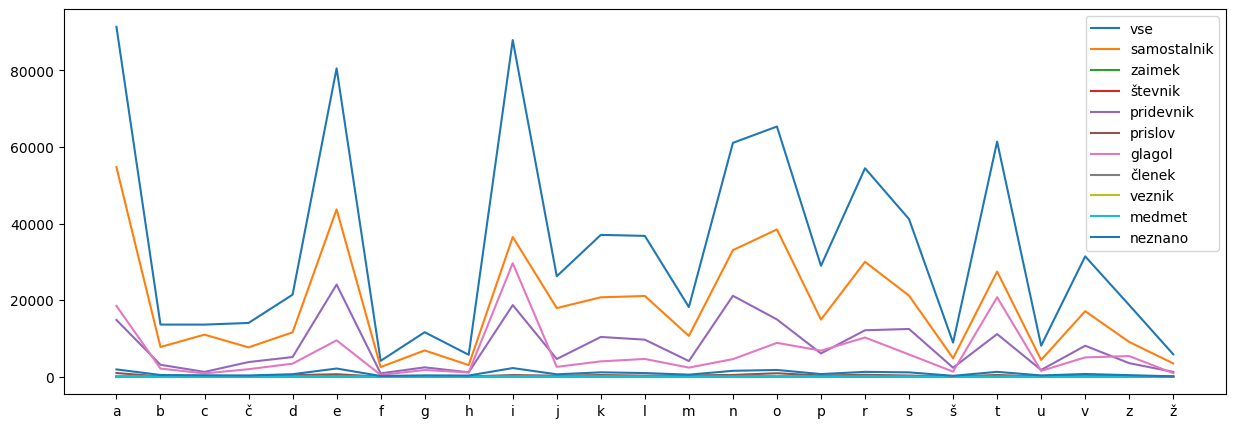

In [14]:
graf = razpredelnica_črk([razpredelnica]+[razpredelnica_vrste(vrsta) for vrsta in besedne_vrste], oznake=["vse"]+besedne_vrste)[["vse"]+besedne_vrste].plot.line(figsize=(15, 5))
graf.set_xticks(range(len(abeceda)));
graf.set_xticklabels(list(abeceda));

Najbrž nam bo graf pogostosti črk povedal več.

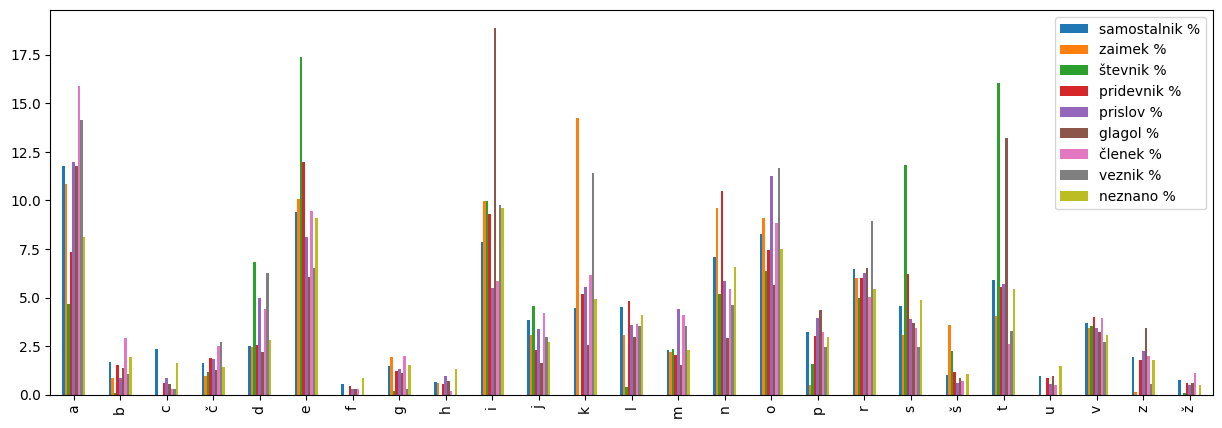

In [15]:
graf = razpredelnica_črk([razpredelnica_vrste(vrsta) for vrsta in besedne_vrste], oznake=besedne_vrste)[map(lambda x: x+" %", besedne_vrste)].plot.bar(figsize=(15, 5))
graf.set_xticks(range(len(abeceda)));
graf.set_xticklabels(list(abeceda));